            speed       power
count  500.000000  500.000000
mean    12.590398   48.014584
std      7.224991   41.614572
min      0.000000    0.000000
25%      6.324750    5.288000
50%     12.550500   41.645500
75%     18.775250   93.537000
max     25.000000  113.556000


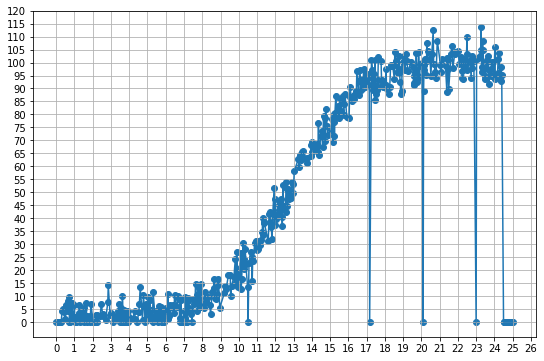

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib

%matplotlib inline

source_df = pd.read_csv("Source_data/Source_file.csv")

print(source_df.describe())

plt.figure(figsize = (9, 6))                                  # Set the plot size
plt.plot(source_df["speed"], source_df["power"])                #
plt.scatter(x = source_df["speed"], y = source_df["power"])
plt.xticks(np.arange(0, round(source_df["speed"].max(), 0) + 2, step = 1)) # Force all the xticks to be visible
plt.yticks(np.arange(0, round(source_df["power"].max(), 0) + 7, step = 5)) # Force all the xticks to be visible
plt.grid(which = "major", axis = "x")                           # Show the minor grid lines on the x axis
plt.grid(which = "major", axis = "y")                           # Show the minor grid lines on the y axis
plt.show()


In [2]:
sp_ar, po_ar = source_df["speed"].values, source_df["power"].values

print("Speed:", sp_ar[:10], "\nPower:", po_ar[:10], sep = "\n")

Speed:
[0.    0.125 0.15  0.225 0.275 0.325 0.4   0.45  0.501 0.526]

Power:
[0.    0.    0.    0.    0.    4.331 5.186 3.826 1.048 5.553]


In [3]:
sp_train_ar, sp_test_ar, po_train_ar, po_test_ar = train_test_split(sp_ar, po_ar, test_size = 0.30, random_state = 36932)

print("Training set: %d rows\nTest set: %d rows" %(sp_train_ar.size, sp_test_ar.size))
print(print("Train:", sp_train_ar[:10], "\nTest:", sp_test_ar[:10], sep = "\n"))


Training set: 350 rows
Test set: 150 rows
Train:
[ 9.81   6.682 20.095 22.347  1.502 21.471 14.765 11.286 14.289 13.964]

Test:
[23.724 11.111  3.804 12.412 14.189 11.011 18.068  2.252  9.985  5.906]
None


In [4]:
lin_model = LinearRegression(fit_intercept=False).fit(sp_train_ar.reshape(-1,1), po_train_ar)
print(lin_model)

LinearRegression(fit_intercept=False)


In [5]:
predictions = lin_model.predict(sp_test_ar.reshape(-1,1))
np.set_printoptions(suppress = True)
print("Predict labels:", np.round(predictions, 3)[:10])
print("Actual labels:", po_test_ar[:10])

Predict labels: [95.131 44.554 15.254 49.771 56.897 44.153 72.451  9.03  40.039 23.683]
Actual labels: [96.986 31.336  0.    52.952 67.263 28.452 97.427  0.    19.354  1.826]


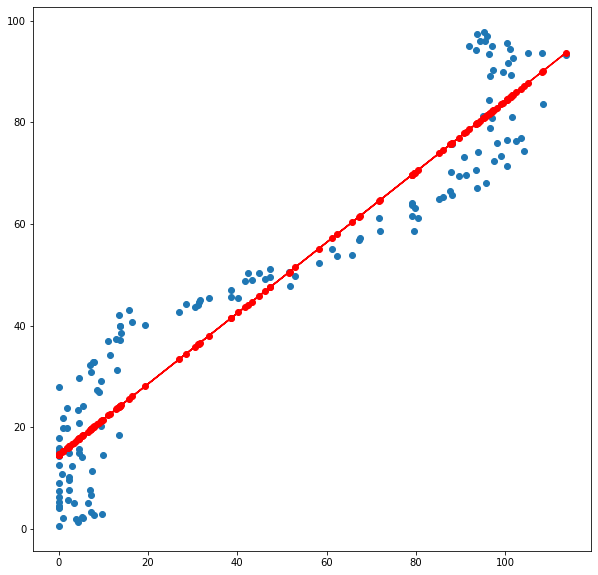

In [6]:
plt.figure(figsize = (10, 10))                                  # Set the plot size
plt.scatter(po_test_ar, predictions)
z = np.polyfit(po_test_ar, predictions, 1)
p = np.poly1d(z)
plt.plot(po_test_ar, p(po_test_ar), color = "r", marker = "o")
plt.show()

In [7]:
mse_lin = mean_squared_error(po_test_ar, predictions)
print("mse_lin:", mse_lin)

rsme_lin = np.sqrt(mse_lin)
print("rsme_lin:", rsme_lin)

r2_lin = r2_score(po_test_ar, predictions)
print("R2_lin:", r2_lin)                                                # R2 is low, suggesting model is not correct

mse_lin: 243.48009681615233
rsme_lin: 15.603848782148344
R2_lin: 0.853228122628176


In [8]:
filename ="C:/Users/markb/OneDrive/Desktop/Data Analytics/Machine Learning/Test/lin_reg.pkl"
joblib.dump(lin_model, filename)

value = float(input("Input a value for the wind speed in m/s:"))

lin_model_load = joblib.load(filename)

speed_new = np.full(shape=1, fill_value=value, dtype="float64").reshape(-1, 1)

print()

if speed_new >= 0:
    
    result = lin_model_load.predict(speed_new)
    kmh = speed_new * 3.6
    MPH = speed_new * 2.23694
    
    if speed_new > 70:
        print("Warning:\nThis wind speed indicates that there is a category 5 hurricane blowing.\nThis faster than the highest recorded wind speed in Ireland.\n\n")
    
    elif speed_new > 58.05556:
        print("Warning:\nThis wind speed indicates that there is a category 4 hurricane blowing.\nThis faster than the highest recorded wind speed in Ireland.\n\n")

    elif speed_new > 50.55556:
        print("Warning:\nThis wind speed indicates that there is a category 3 hurricane blowing.\nThis faster than the highest recorded wind speed in Ireland.\n\n")
    
    elif speed_new > 49.44444:
        print("Warning:\nThis wind speed indicates that there is a category 3 hurricane blowing.\n\n")

    elif speed_new > 42.77778:
        print("Warning:\nThis wind speed indicates that there is a category 2 hurricane blowing.\n\n")
    
    elif speed_new > 33.05556:
        print("Warning:\nThis wind speed indicates that there is a category 1 hurricane blowing.\n\n")
    
    elif speed_new > 28.61111:
        print("Warning:\nThis wind speed indicates that there is a storm blowing.\n\n")
    
    print("Estimated power produced at wind speed of %.3f m/s (%.2f km/h, %.2f MPH) is %.3f kW/h." % (speed_new, kmh, MPH, result[0]))
              
else:
    print("Wind speed value cannot be negative.\nPlease select another wind speed value that is positive")
  

Input a value for the wind speed in m/s:7

Estimated power produced at wind speed of 7.000 m/s (25.20 km/h, 15.66 MPH) is 28.069 kW/h.
